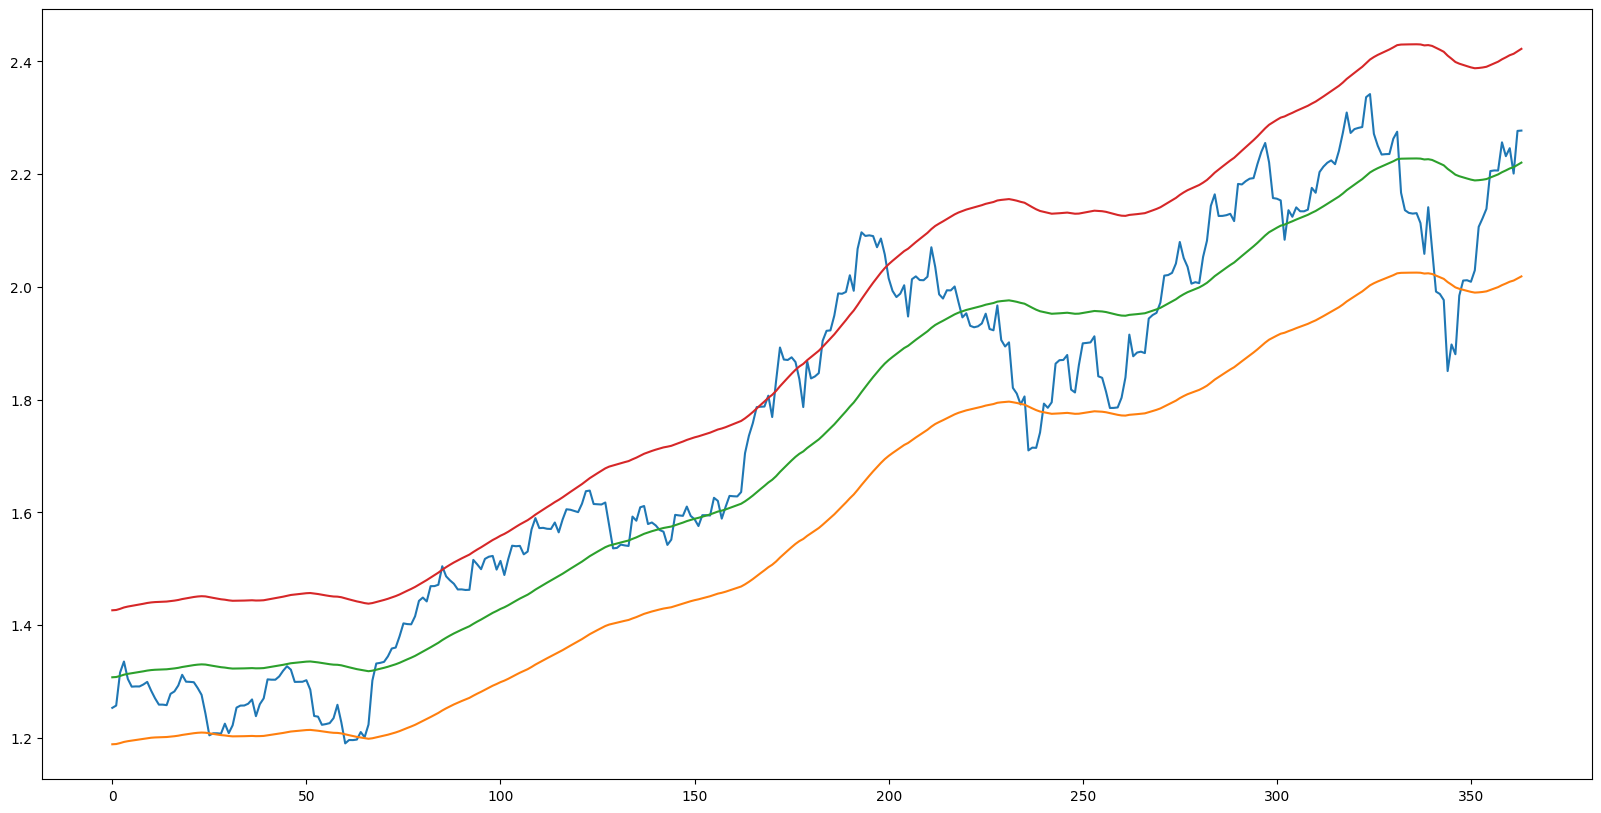

In [31]:
import asyncio

import numpy as np
from matplotlib import pyplot

from backend import crypto, stock
from backend.position import calc_ema, calc_k

weights = [
    0.100,
    0.091,
    0.181,
    0.102,
    0.179,
    0.131,
    0.115,
    0.100,
]
w = 91
scale = 364
positions = [
    ('c', 'ETH'),
    ('u', 'COIN'),
    ('t', '2330'),
    ('t', '3661'),
    ('u', 'AAPL'),
    ('u', 'NVDA'),
    ('u', 'TSLA'),
    ('u', 'PLTR'),
]

n = scale + calc_k(w) - 1
P = np.array(
    await asyncio.gather(
        *[
            (crypto.get_prices(p[1], n) if p[0] == 'c' else stock.get_prices(*p, n))
            for p in positions
        ]
    )
)
R = weights @ (P / P[:, [0]])
B = calc_ema(R, 2 / (w + 1), calc_k(w))

pyplot.figure(figsize=(20, 10))
pyplot.plot(R[-len(B) :])
pyplot.plot(B)
pyplot.plot(B * 1.1)
pyplot.plot(B * 1.2)

(array([ 1.,  0.,  2.,  0.,  3.,  0.,  2.,  3.,  6., 14., 12.,  9.,  4.,
         4., 12., 19., 10., 14., 16., 19., 17., 24., 12., 22., 11.,  8.,
        21., 15., 26., 20.,  8.,  5.,  5.,  4.,  4.,  4.,  3.,  1.,  3.,
         1.]),
 array([0.92140647, 0.93017033, 0.93893418, 0.94769804, 0.9564619 ,
        0.96522575, 0.97398961, 0.98275346, 0.99151732, 1.00028117,
        1.00904503, 1.01780889, 1.02657274, 1.0353366 , 1.04410045,
        1.05286431, 1.06162817, 1.07039202, 1.07915588, 1.08791973,
        1.09668359, 1.10544744, 1.1142113 , 1.12297516, 1.13173901,
        1.14050287, 1.14926672, 1.15803058, 1.16679443, 1.17555829,
        1.18432215, 1.193086  , 1.20184986, 1.21061371, 1.21937757,
        1.22814143, 1.23690528, 1.24566914, 1.25443299, 1.26319685,
        1.2719607 ]),
 <BarContainer object of 40 artists>)

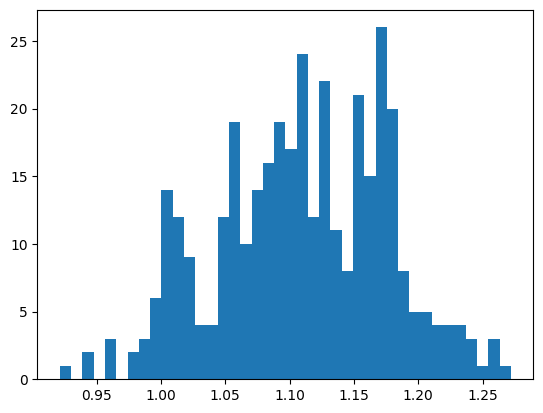

In [29]:
pyplot.hist(R[-len(B):] / B, bins=30)